# Average performance of best performing hyperparameters in Case 1

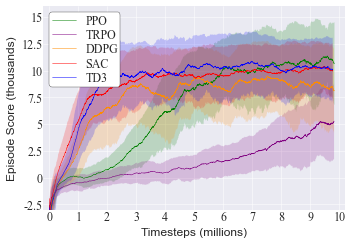

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.pyplot import gca
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
plt.style.use('seaborn')

seed_list = [0, 1, 2, 3, 4]
n_steps = 250

fig = plt.figure(figsize=(5, 3.5))

########### On policy results ###############################
algo_list = [ "PPO", "TRPO"]
batch_list_best = [32000, 8000]
color = ['green', 'purple']

for i, algo in enumerate(algo_list):
    batch = batch_list_best[i]
    df_list = []
    for j, seed in enumerate(seed_list):
        fname = ("./Case1/log_"+str(algo)+"_3d-tracking_id-"+str(batch)+"-0.98_"+str(seed)+"_tanh_64_64/monitor.csv")   
        df = pd.read_csv(fname, skiprows=1)
        df['time'] = np.cumsum(df['l'].values)
        df_list.append(df)
        
    df_all = pd.concat(df_list).sort_values('time')
    timesteps = df_all['time'].rolling(n_steps,min_periods=1).mean()
    smooth_path    = df_all['r'].rolling(n_steps,min_periods=1).mean()/1000
    path_deviation = df_all['r'].rolling(n_steps,min_periods=1).std()/1000
    under_line     = (smooth_path-path_deviation)
    over_line      = (smooth_path+path_deviation)
    plt.plot(timesteps, smooth_path, c=color[i], label=str(algo), linewidth = 0.5, zorder=2)
    art = plt.fill_between(timesteps, under_line, over_line, color=color[i], alpha=.2, edgecolor=None, zorder=1, rasterized=True)
    art.set_edgecolor(None)

########### Off policy results ###############################
algo_list = ["DDPG", "SAC", "TD3"]
batch_list_best = [2000000, 2000000, 2000000]
color = ['darkorange', 'red', 'blue']

for i, algo in enumerate(algo_list):
    batch = batch_list_best[i]
    df_list = []
    for j, seed in enumerate(seed_list):
        fname = ("./Case1/log_"+str(algo)+"_3d-tracking_buffer-v4_id-"+str(batch)+"-0.98_"+str(seed)+"_tanh_64_64/monitor.csv") 
        df = pd.read_csv(fname, skiprows=1)
        df['time'] = np.cumsum(df['l'].values)
        df_list.append(df)
    
    df_all = pd.concat(df_list).sort_values('time')
    timesteps = df_all['time'].rolling(n_steps,min_periods=1).mean()
    smooth_path    = df_all['r'].rolling(n_steps,min_periods=1).mean()/1000
    path_deviation = df_all['r'].rolling(n_steps,min_periods=1).std()/1000
    under_line     = (smooth_path-path_deviation)
    over_line      = (smooth_path+path_deviation)
    plt.plot(timesteps, smooth_path, c=color[i], label=str(algo), linewidth = 0.5, zorder=2)
    art = plt.fill_between(timesteps, under_line, over_line, color=color[i], alpha=.2, edgecolor=None, zorder=1, rasterized=True)
    art.set_edgecolor(None)

font = font_manager.FontProperties(family='Times New Roman', weight='normal', style='normal', size=12)
leg = plt.legend(ncol=1, loc="upper left", frameon = True, framealpha=1.0, labelspacing=0.2, borderpad = 0.2, prop=font)
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_facecolor('w')

plt.ylabel('Episode Score (thousands)', fontsize = 12)
plt.yticks([-2.5, 0, 2.5, 5, 7.5, 10, 12.50, 15], fontsize =12, fontname='Times New Roman')
gca().yaxis.set_major_formatter(FormatStrFormatter('%g'))
plt.ylim([-3.0, 16])

plt.xlabel('Timesteps (millions)', fontsize = 12)
plt.xticks(np.linspace(0,10e6, 11), fontsize =12, fontname='Times New Roman')
plt.setp(plt.gca().get_xaxis().get_offset_text(), visible=False)
plt.ticklabel_format(style='sci', axis='x', scilimits=(6,6))
plt.xlim([-0.2e6, 10.2e6])

plt.tick_params(axis='both', which='major', pad=1)

gca().grid(linewidth=0.5)
plt.tight_layout()
plt.savefig('Case1-learning_curve.png', bbox_inches='tight',dpi=300)
# plt.show()


# Average results for different batchsizes (On Policy Algorithm) 

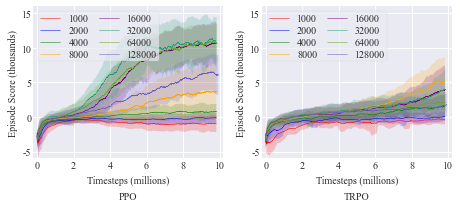

In [5]:
n_steps = 250
seed_list = [0, 1, 2, 3, 4]

fig = plt.figure(figsize=(6.5,3))
f=0

batch_list = [1000, 2000, 4000, 8000, 16000, 32000, 64000, 128000]
algo_list = [ "PPO", "TRPO"]
color = ['red', 'blue', 'green', 'orange', 'purple', '#1b9e77', '#66a61e', 'slateblue']
label = ['(a)','(b)']

for k, algo in enumerate(algo_list):
    plt.subplot(1,2,f+1)
    f+=1
    for i, batch in enumerate(batch_list):
        df_list = []
        for j, seed in enumerate(seed_list):
            fname = ("./Case1/log_"+str(algo)+"_3d-tracking_id-"+str(batch)+"-0.98_"+str(seed)+"_tanh_64_64/monitor.csv")  
            df = pd.read_csv(fname, skiprows=1)
            df['time'] = np.cumsum(df['l'].values)
            df_list.append(df)

        df_all = pd.concat(df_list).sort_values('time')
        timesteps = df_all['time'].rolling(n_steps,min_periods=1).mean()
        smooth_path    = df_all['r'].rolling(n_steps,min_periods=1).mean()/1000
        path_deviation = df_all['r'].rolling(n_steps,min_periods=1).std()/1000
        under_line     = (smooth_path-path_deviation)
        over_line      = (smooth_path+path_deviation)
        plt.plot(timesteps, smooth_path, c=color[i], label=str(batch), linewidth = 0.5, zorder=2)
        art = plt.fill_between(timesteps, under_line, over_line, color=color[i], alpha=.2, edgecolor=None, zorder=1,rasterized=True)
        art.set_edgecolor(None)

    plt.setp(plt.gca().get_yaxis().get_offset_text(), visible=False)
    plt.yticks([-5.0, 0, 5, 10, 15], fontsize =10, fontname='Times New Roman')
    plt.ylabel('Episode Score (thousands)', fontsize = 10, fontname='Times New Roman')
    plt.ylim([-6.0, 16])

    plt.setp(plt.gca().get_xaxis().get_offset_text(), visible=False)
    plt.xticks(np.linspace(0,10e6, 6), fontsize =10, fontname='Times New Roman')
    label[k]=algo
    plt.xlabel('Timesteps (millions)\n'+label[k], fontsize = 10, fontname='Times New Roman',linespacing = 1.75)
    plt.xlim([-0.2e6, 10.2e6])
        
    gca().grid(linewidth=1.0)
    plt.tick_params(axis='both', which='major', pad=2)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(6,6))
    gca().yaxis.set_major_formatter(FormatStrFormatter('%g'))
    
    font = font_manager.FontProperties(family='Times New Roman', weight='normal', style='normal', size=10)
    leg = plt.legend(ncol=2, loc="upper left", frameon = True, framealpha=0.7,  
                     labelspacing=0.2, borderpad = 0.2, prop=font, columnspacing=1)
    
plt.tight_layout()
# plt.show()
plt.savefig('Case1_onpolicy.png', dpi=300,bbox_inches='tight')

# Average results for different replay buffer sizes (Off Policy Algorithm)

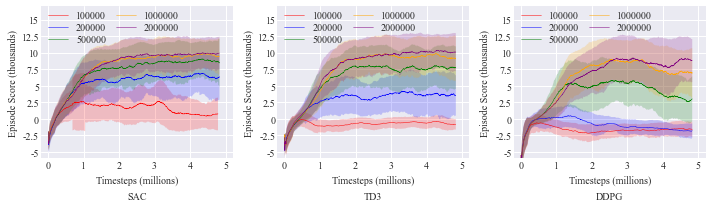

In [6]:
n_steps=250
seed_list = [0, 1, 2, 3, 4]

fig = plt.figure(figsize=(10,3))
f=0

algo_list = ["SAC", "TD3","DDPG"]
batch_list = [100000, 200000, 500000, 1000000, 2000000]
color = ['red', 'blue', 'green', 'orange', 'purple', '#1b9e77', '#66a61e', 'darkgrey']
label = ['(a)','(b)','(c)']

for k, algo in enumerate(algo_list):
    plt.subplot(1,3,f+1)
    f+=1
    for i, batch in enumerate(batch_list):
        df_list = []
        for j, seed in enumerate(seed_list):
            fname = ("./Case1/log_"+str(algo)+"_3d-tracking_buffer_id-"+str(batch)+"-0.98_"+str(seed)+"_tanh_64_64/monitor.csv") 
            df = pd.read_csv(fname, skiprows=1)
            df['time'] = np.cumsum(df['l'].values)
            df_list.append(df)

        df_all = pd.concat(df_list).sort_values('time')
        timesteps = df_all['time'].rolling(n_steps,min_periods=1).mean()
        smooth_path    = df_all['r'].rolling(n_steps,min_periods=1).mean()/1000
        path_deviation = df_all['r'].rolling(n_steps,min_periods=1).std()/1000
        under_line     = (smooth_path-path_deviation)
        over_line      = (smooth_path+path_deviation)
        plt.plot(timesteps, smooth_path, c=color[i], label=str(batch), linewidth = 0.5, zorder=2)
        art = plt.fill_between(timesteps, under_line, over_line, color=color[i], alpha=.2, edgecolor=None, zorder=1,rasterized=True)
        art.set_edgecolor(None)

    plt.setp(plt.gca().get_yaxis().get_offset_text(), visible=False)
    plt.yticks([-5.0, -2.5, 0, 2.5, 5, 7.5, 10, 12.5, 15], fontsize =10, fontname='Times New Roman')
    plt.ylabel('Episode Score (thousands)', fontsize = 10, fontname='Times New Roman')
    plt.ylim([-6.0, 17])
    
    plt.setp(plt.gca().get_xaxis().get_offset_text(), visible=False)
    plt.xticks(np.linspace(0,10e6, 11), fontsize =10, fontname='Times New Roman')
    label[k]=algo
    plt.xlabel('Timesteps (millions)\n'+label[k], fontsize = 10, fontname='Times New Roman',linespacing = 1.75)
    plt.xlim([-0.2e6, 5.2e6])

    gca().grid(linewidth=1.0)
    plt.tick_params(axis='both', which='major', pad=2)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(6,6))
    gca().yaxis.set_major_formatter(FormatStrFormatter('%g'))
    font = font_manager.FontProperties(family='Times New Roman',weight='normal',style='normal', size=10)
    leg = plt.legend(ncol=2, loc="upper left", frameon = False,   framealpha=0.7,  labelspacing=0.2, 
                     borderpad = 0.2, prop=font, columnspacing=1, bbox_to_anchor=(0.0, 1.02))

plt.tight_layout()
plt.savefig('Case1_offpolicy.png', dpi=300, bbox_inches='tight')
# plt.show()